# GRIP: The Sparks Foundation
### GRIPJANUARY23
### Task 01: Prediction using Supervised Machine Learning
##### Student: Sithu Diddeniya

### Task
#### Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

#### Importing dataset and libraries 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [25]:
url = "http://bit.ly/w-data"
dfstu = pd.read_csv(url)

In [26]:
dfstu.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
# Statistical_details 

dfstu.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
# Calculating_coeficient_correlation

dfstu.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### The correlation between Hours and Scores is 0.976, which means those two variables have a strong correlation because of coefficient correlation value is close to 1.

#### Data Preprocessing
#### Identifying the independent variable (x) and the dependent variable (y) by dividing the data as:

##### Input (x): the "Hours" column
##### Output (y): the "Scores" column

In [29]:
X = dfstu.iloc[:, :-1].values  
y = dfstu.iloc[:, 1].values  

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

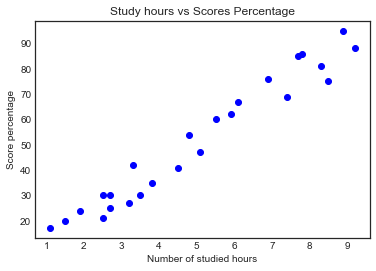

In [30]:
plt.scatter(X, y, color= 'blue')
plt.xlabel("Number of studied hours") 
plt.ylabel("Score percentage")
plt.title('Study hours vs Scores Percentage');

#### positive linear relation between the number of hours studied and percentage of scores.

#### Splitting the dataset
 ##### 30%as test data and 70% as the train data.

In [31]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

Fitting linear regression model into the training set.

In [32]:
from sklearn.linear_model import LinearRegression

Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

#### Predicting the test set results 

In [33]:
# Predicting the y value based on testing data

y_pred = Model.predict(X_test)

In [34]:
# Comparing y-value actual and prediction of testing data

df_scompare = pd.DataFrame({'Actual' : y_test, 'Prediction': y_pred})
df_scompare

,Actual,Prediction
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [16]:
#New data entry = 9.25 (Hours)

X_new = np.array([9.75]).reshape(-1,1)
y_pred_new = Model.predict(X_new)

print("Prediction over test data: \n",y_pred_new )

Prediction over test data: 
 [97.80934058]


##### According to the model, if a student studies for 9.25 hours, he will score around 97.8% on the test.



In [17]:
# Interpreting the intercept and coefficient of the model

Intercept = Model.intercept_
print("Intercept: \n", Intercept)

Coefficient = Model.coef_
print("Coefficient: \n", Coefficient)

Intercept: 
 2.370815382341867
Coefficient: 
 [9.78856669]


##### From resutls, calculated  model intercept as 2.3708153823418883 and the model coefficient as 9.78856669.

##### Linear regression equation is Y = 9.78856669X + 2.3708153823418883. 

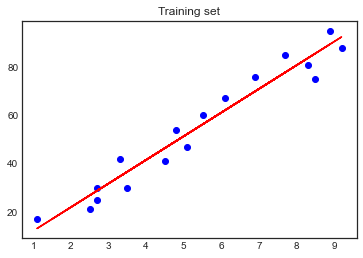

In [23]:
# Plotting the regression line
line = 9.78856669*X + 2.3708153823418883

# Plotting for the train data
plt.scatter(X_train, y_train,color="blue")
plt.plot(X, line, color="red");
plt.title('Training set')
plt.show();


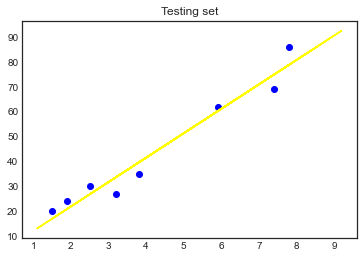

In [19]:
# Plotting the regression line
line = 9.78856669*X + 2.3708153823418883

# Plotting for the test data
plt.scatter(X_test, y_test, color="blue")
plt.plot(X, line, color="yellow");
plt.title('Testing set');
plt.show()

##### Model evaluation

In [20]:
from sklearn import metrics  
from sklearn.metrics import mean_squared_error

# R^2 value
r2_value = Model.score(X_train, y_train)
print("R^2 value: \n", r2_value)

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Deviation: \n", rmsd)

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: \n", mae)
     

R^2 value: 
 0.9484997422695115
Root Mean Square Deviation: 
 4.792191274636316
Mean Absolute Error: 
 4.4197278080276545


##### Higher the R^2, model best fit.

##### According to MAE, the average error between the predictions and actuals in this dataset is 4.419.

##### Lower the RMSE , model best fit. RMSE is a good measure of how accurately the model predicts the response.